In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math

In [2]:
raw_cav_data = pd.read_csv("Absenteeism-data.csv")
raw_cav_data

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


In [3]:
raw_cav_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


In [4]:
raw_cav_data.isna().sum()

ID                           0
Reason for Absence           0
Date                         0
Transportation Expense       0
Distance to Work             0
Age                          0
Daily Work Load Average      0
Body Mass Index              0
Education                    0
Children                     0
Pets                         0
Absenteeism Time in Hours    0
dtype: int64

In [5]:
type(raw_cav_data)

pandas.core.frame.DataFrame

In [6]:
df=raw_cav_data.copy()

In [7]:
pd.options.display.max_columns = None
#pd.options.display.max_rows = 5
display(df)
df.info()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


In [8]:
df =df.drop(['ID'],axis=1)   # axis = 0 means rows axis=1 means column wise 
df #droping colunm

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...
695,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


In [9]:
df['Reason for Absence'].min()
df['Reason for Absence'].max()
pd.unique(df['Reason for Absence'])
df['Reason for Absence'].unique()
sorted(df['Reason for Absence'].unique())
len(df['Reason for Absence'].unique())

28

In [10]:
##############'.get_dumies'##############
reason_columns = pd.get_dummies(df['Reason for Absence'])
reason_columns

#reason_columns['check'].sum(axis=0)
#reason_columns['check'].unique()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [11]:
reason_columns['check'] = reason_columns.sum(axis=1)
reason_columns

# reason_columns['check'] = reason_columns.sum(axis=0)
# reason_columns

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,check
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,1
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1
696,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1
697,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1
698,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1


In [12]:
#df.columns.values
#reason_columns.columns.values
df = df.drop(['Reason for Absence'],axis=1)
#df

#reason_columns.loc[:,1:14].max(axis=1)
reason_type_1 = reason_columns.loc[:,1:14].max(axis=1)
reason_type_2 = reason_columns.loc[:,15:17].max(axis=1)
reason_type_3 = reason_columns.loc[:,18:21].max(axis=1)
reason_type_4 = reason_columns.loc[:,22:28].max(axis=1)
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [13]:
################## concanate column name ######################
df = pd.concat([df,reason_type_1,reason_type_2,reason_type_3,reason_type_4],axis=1)
df

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,False,False,False,True
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,False,False,False,False
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,False,False,False,True
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,True,False,False,False
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,23/05/2018,179,22,40,237.656,22,2,2,0,8,True,False,False,False
696,23/05/2018,225,26,28,237.656,24,1,1,2,3,True,False,False,False
697,24/05/2018,330,16,28,237.656,25,2,0,0,8,True,False,False,False
698,24/05/2018,235,16,32,237.656,25,3,0,0,2,False,False,False,True


In [14]:
df.columns.values

array(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 0, 1, 2, 3],
      dtype=object)

In [15]:
#df.columns

In [16]:
column_name = (['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'reason_type_1','reason_type_2','reason_type_3','reason_type_4',])

In [17]:
df.columns = column_name

In [18]:
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,reason_type_1,reason_type_2,reason_type_3,reason_type_4
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,False,False,False,True
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,False,False,False,False
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,False,False,False,True
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,True,False,False,False
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,False,False,False,True


In [19]:
############3 create a checkpoint#############3


df_reason_mod = df.copy()
df_reason_mod

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,reason_type_1,reason_type_2,reason_type_3,reason_type_4
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,False,False,False,True
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,False,False,False,False
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,False,False,False,True
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,True,False,False,False
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,23/05/2018,179,22,40,237.656,22,2,2,0,8,True,False,False,False
696,23/05/2018,225,26,28,237.656,24,1,1,2,3,True,False,False,False
697,24/05/2018,330,16,28,237.656,25,2,0,0,8,True,False,False,False
698,24/05/2018,235,16,32,237.656,25,3,0,0,2,False,False,False,True


In [20]:
df_reason_mod['Date']
#df_reason_mod['Date'][0]
#type(df_reason_mod['Date'][0])
#df_reason_mod['Date'] = pd.to_datetime(df_reason_mod['Date'],format = '%d/%m/%Y')
# 

0      07/07/2015
1      14/07/2015
2      15/07/2015
3      16/07/2015
4      23/07/2015
          ...    
695    23/05/2018
696    23/05/2018
697    24/05/2018
698    24/05/2018
699    31/05/2018
Name: Date, Length: 700, dtype: object

In [21]:
df_reason_mod['Date'][0]

'07/07/2015'

In [22]:
type(df_reason_mod['Date'][0])

str

In [23]:
df_reason_mod['Date'] = pd.to_datetime(df_reason_mod['Date'],format = '%d/%m/%Y')
df_reason_mod['Date']

0     2015-07-07
1     2015-07-14
2     2015-07-15
3     2015-07-16
4     2015-07-23
         ...    
695   2018-05-23
696   2018-05-23
697   2018-05-24
698   2018-05-24
699   2018-05-31
Name: Date, Length: 700, dtype: datetime64[ns]

In [24]:
# Extract components
df_reason_mod['day'] = df_reason_mod['Date'].dt.day  # Extract the day
df_reason_mod['day']
#df_reason_mod['month'] = df_reason_mod['date_column'].dt.month      # Extract the month
#df_reason_mod['year'] = df_reason_mod['date_column'].dt.year        # Extract the year
#df_reason_mod['day_name'] = df_reason_mod['date_column'].dt.day_name()  # Extract the day name (e.g., Monday, Tuesday)
#df_reason_mod['month_name'] = df_reason_mod['date_column'].dt.month_name()  # Extract the month name (e.g., January, February)

0       7
1      14
2      15
3      16
4      23
       ..
695    23
696    23
697    24
698    24
699    31
Name: day, Length: 700, dtype: int32

In [25]:
df_reason_mod['year'] = df_reason_mod['Date'].dt.year        # Extract the year
df_reason_mod['year']

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
695    2018
696    2018
697    2018
698    2018
699    2018
Name: year, Length: 700, dtype: int32

In [26]:
df_reason_mod

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,reason_type_1,reason_type_2,reason_type_3,reason_type_4,day,year
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,False,False,False,True,7,2015
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,False,False,False,False,14,2015
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,False,False,False,True,15,2015
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,True,False,False,False,16,2015
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,False,False,False,True,23,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2018-05-23,179,22,40,237.656,22,2,2,0,8,True,False,False,False,23,2018
696,2018-05-23,225,26,28,237.656,24,1,1,2,3,True,False,False,False,23,2018
697,2018-05-24,330,16,28,237.656,25,2,0,0,8,True,False,False,False,24,2018
698,2018-05-24,235,16,32,237.656,25,3,0,0,2,False,False,False,True,24,2018


In [27]:
df_reason_mod['month'] = df_reason_mod['Date'].dt.month      # Extract the month
df_reason_mod['month'] 

0      7
1      7
2      7
3      7
4      7
      ..
695    5
696    5
697    5
698    5
699    5
Name: month, Length: 700, dtype: int32

In [28]:
df_reason_mod['day_name'] = df_reason_mod['Date'].dt.day_name()  # Extract the day name (e.g., Monday, Tuesday)
df_reason_mod['day_name']

0        Tuesday
1        Tuesday
2      Wednesday
3       Thursday
4       Thursday
         ...    
695    Wednesday
696    Wednesday
697     Thursday
698     Thursday
699     Thursday
Name: day_name, Length: 700, dtype: object

In [29]:
df_reason_mod['month_name'] = df_reason_mod['Date'].dt.month_name()  # Extract the month name (e.g., January, February)
df_reason_mod['month_name']

0      July
1      July
2      July
3      July
4      July
       ... 
695     May
696     May
697     May
698     May
699     May
Name: month_name, Length: 700, dtype: object

In [30]:
df_reason_mod

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,reason_type_1,reason_type_2,reason_type_3,reason_type_4,day,year,month,day_name,month_name
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,False,False,False,True,7,2015,7,Tuesday,July
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,False,False,False,False,14,2015,7,Tuesday,July
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,False,False,False,True,15,2015,7,Wednesday,July
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,True,False,False,False,16,2015,7,Thursday,July
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,False,False,False,True,23,2015,7,Thursday,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2018-05-23,179,22,40,237.656,22,2,2,0,8,True,False,False,False,23,2018,5,Wednesday,May
696,2018-05-23,225,26,28,237.656,24,1,1,2,3,True,False,False,False,23,2018,5,Wednesday,May
697,2018-05-24,330,16,28,237.656,25,2,0,0,8,True,False,False,False,24,2018,5,Thursday,May
698,2018-05-24,235,16,32,237.656,25,3,0,0,2,False,False,False,True,24,2018,5,Thursday,May


In [31]:
df_reason_mod = df_reason_mod.drop(['Date'], axis = 1)

In [32]:
df_cleaned = df_reason_mod.copy()
df_cleaned.head(10)

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,reason_type_1,reason_type_2,reason_type_3,reason_type_4,day,year,month,day_name,month_name
0,289,36,33,239.554,30,1,2,1,4,False,False,False,True,7,2015,7,Tuesday,July
1,118,13,50,239.554,31,1,1,0,0,False,False,False,False,14,2015,7,Tuesday,July
2,179,51,38,239.554,31,1,0,0,2,False,False,False,True,15,2015,7,Wednesday,July
3,279,5,39,239.554,24,1,2,0,4,True,False,False,False,16,2015,7,Thursday,July
4,289,36,33,239.554,30,1,2,1,2,False,False,False,True,23,2015,7,Thursday,July
5,179,51,38,239.554,31,1,0,0,2,False,False,False,True,10,2015,7,Friday,July
6,361,52,28,239.554,27,1,1,4,8,False,False,False,True,17,2015,7,Friday,July
7,260,50,36,239.554,23,1,4,0,4,False,False,False,True,24,2015,7,Friday,July
8,155,12,34,239.554,25,1,2,0,40,False,False,True,False,6,2015,7,Monday,July
9,235,11,37,239.554,29,3,1,1,8,False,False,False,True,13,2015,7,Monday,July


In [33]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transportation Expense     700 non-null    int64  
 1   Distance to Work           700 non-null    int64  
 2   Age                        700 non-null    int64  
 3   Daily Work Load Average    700 non-null    float64
 4   Body Mass Index            700 non-null    int64  
 5   Education                  700 non-null    int64  
 6   Children                   700 non-null    int64  
 7   Pets                       700 non-null    int64  
 8   Absenteeism Time in Hours  700 non-null    int64  
 9   reason_type_1              700 non-null    bool   
 10  reason_type_2              700 non-null    bool   
 11  reason_type_3              700 non-null    bool   
 12  reason_type_4              700 non-null    bool   
 13  day                        700 non-null    int32  

In [34]:
df_reason_date_mod = df_reason_mod.copy()
df_reason_date_mod

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,reason_type_1,reason_type_2,reason_type_3,reason_type_4,day,year,month,day_name,month_name
0,289,36,33,239.554,30,1,2,1,4,False,False,False,True,7,2015,7,Tuesday,July
1,118,13,50,239.554,31,1,1,0,0,False,False,False,False,14,2015,7,Tuesday,July
2,179,51,38,239.554,31,1,0,0,2,False,False,False,True,15,2015,7,Wednesday,July
3,279,5,39,239.554,24,1,2,0,4,True,False,False,False,16,2015,7,Thursday,July
4,289,36,33,239.554,30,1,2,1,2,False,False,False,True,23,2015,7,Thursday,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,179,22,40,237.656,22,2,2,0,8,True,False,False,False,23,2018,5,Wednesday,May
696,225,26,28,237.656,24,1,1,2,3,True,False,False,False,23,2018,5,Wednesday,May
697,330,16,28,237.656,25,2,0,0,8,True,False,False,False,24,2018,5,Thursday,May
698,235,16,32,237.656,25,3,0,0,2,False,False,False,True,24,2018,5,Thursday,May


In [35]:
df_reason_date_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transportation Expense     700 non-null    int64  
 1   Distance to Work           700 non-null    int64  
 2   Age                        700 non-null    int64  
 3   Daily Work Load Average    700 non-null    float64
 4   Body Mass Index            700 non-null    int64  
 5   Education                  700 non-null    int64  
 6   Children                   700 non-null    int64  
 7   Pets                       700 non-null    int64  
 8   Absenteeism Time in Hours  700 non-null    int64  
 9   reason_type_1              700 non-null    bool   
 10  reason_type_2              700 non-null    bool   
 11  reason_type_3              700 non-null    bool   
 12  reason_type_4              700 non-null    bool   
 13  day                        700 non-null    int32  

In [36]:
display(df_reason_date_mod)
df_reason_date_mod['Education'].unique()
df_reason_date_mod['Education'].unique()
df_reason_date_mod['Education'] = df_reason_date_mod['Education'].map({1:0, 2:1, 3:1, 4:1})
df_reason_date_mod['Education'].unique()
df_reason_date_mod['Education'].value_counts()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,reason_type_1,reason_type_2,reason_type_3,reason_type_4,day,year,month,day_name,month_name
0,289,36,33,239.554,30,1,2,1,4,False,False,False,True,7,2015,7,Tuesday,July
1,118,13,50,239.554,31,1,1,0,0,False,False,False,False,14,2015,7,Tuesday,July
2,179,51,38,239.554,31,1,0,0,2,False,False,False,True,15,2015,7,Wednesday,July
3,279,5,39,239.554,24,1,2,0,4,True,False,False,False,16,2015,7,Thursday,July
4,289,36,33,239.554,30,1,2,1,2,False,False,False,True,23,2015,7,Thursday,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,179,22,40,237.656,22,2,2,0,8,True,False,False,False,23,2018,5,Wednesday,May
696,225,26,28,237.656,24,1,1,2,3,True,False,False,False,23,2018,5,Wednesday,May
697,330,16,28,237.656,25,2,0,0,8,True,False,False,False,24,2018,5,Thursday,May
698,235,16,32,237.656,25,3,0,0,2,False,False,False,True,24,2018,5,Thursday,May


Education
0    583
1    117
Name: count, dtype: int64

In [37]:
df_reason_date_mod['Education'].unique()


array([0, 1])

In [38]:
df_reason_date_mod['Education'].unique()


array([0, 1])

In [38]:
#df_reason_date_mod['Education'] = df_reason_date_mod['Education'].map({1:0, 2:1, 3:1, 4:1})
#df_reason_date_mod

In [39]:
df_reason_date_mod['Education'].unique()


array([0, 1])

In [39]:
df_reason_date_mod['Education'].value_counts()

Education
0    583
1    117
Name: count, dtype: int64

In [40]:
 ########## Final Checkpoint ######################
df_cleaned = df_reason_date_mod.copy()
df_cleaned.head(10)


,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,reason_type_1,reason_type_2,reason_type_3,reason_type_4,day,year,month,day_name,month_name
0,289,36,33,239.554,30,0,2,1,4,False,False,False,True,7,2015,7,Tuesday,July
1,118,13,50,239.554,31,0,1,0,0,False,False,False,False,14,2015,7,Tuesday,July
2,179,51,38,239.554,31,0,0,0,2,False,False,False,True,15,2015,7,Wednesday,July
3,279,5,39,239.554,24,0,2,0,4,True,False,False,False,16,2015,7,Thursday,July
4,289,36,33,239.554,30,0,2,1,2,False,False,False,True,23,2015,7,Thursday,July
5,179,51,38,239.554,31,0,0,0,2,False,False,False,True,10,2015,7,Friday,July
6,361,52,28,239.554,27,0,1,4,8,False,False,False,True,17,2015,7,Friday,July
7,260,50,36,239.554,23,0,4,0,4,False,False,False,True,24,2015,7,Friday,July
8,155,12,34,239.554,25,0,2,0,40,False,False,True,False,6,2015,7,Monday,July
9,235,11,37,239.554,29,1,1,1,8,False,False,False,True,13,2015,7,Monday,July


## DATA VISUALIZATON ##

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### 1. Histogram of 'Absenteeism Time in Hours' #####

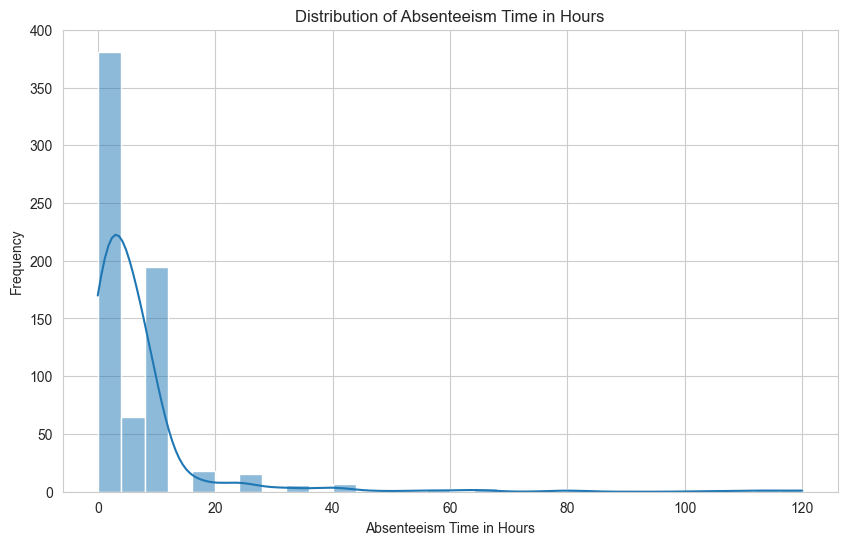

In [42]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Absenteeism Time in Hours'], bins=30, kde=True)
plt.title('Distribution of Absenteeism Time in Hours')
plt.xlabel('Absenteeism Time in Hours')
plt.ylabel('Frequency')
plt.savefig('histogram_absenteeism_time.png')
plt.show()

#####  2. Correlation Heatmap: #####

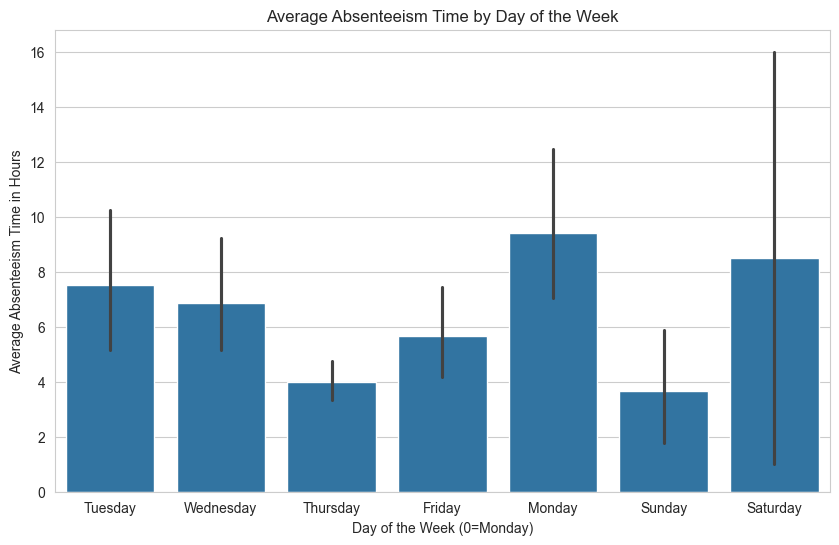

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x='day_name', y='Absenteeism Time in Hours', data=df_cleaned)
plt.title('Average Absenteeism Time by Day of the Week')
plt.xlabel('Day of the Week (0=Monday)')
plt.ylabel('Average Absenteeism Time in Hours')
#plt.savefig('barplot_absenteeism_day_of_week.png')
plt.show()

#####  3. Boxplot of Absenteeism Time vs Day of the Week: #####

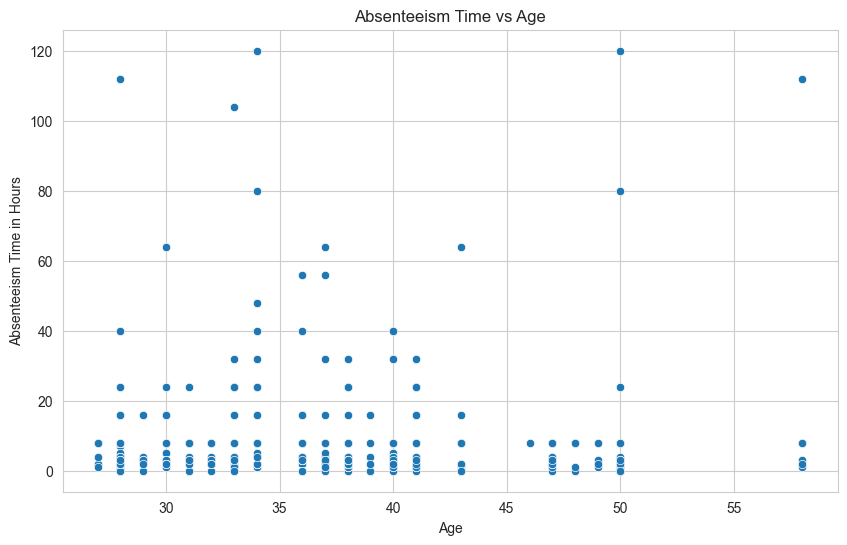

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Absenteeism Time in Hours', data=df_cleaned)
plt.title('Absenteeism Time vs Age')
plt.xlabel('Age')
plt.ylabel('Absenteeism Time in Hours')
plt.savefig('scatterplot_age_absenteeism.png')
plt.show()


##### 4. Countplot of Education Levels: #####

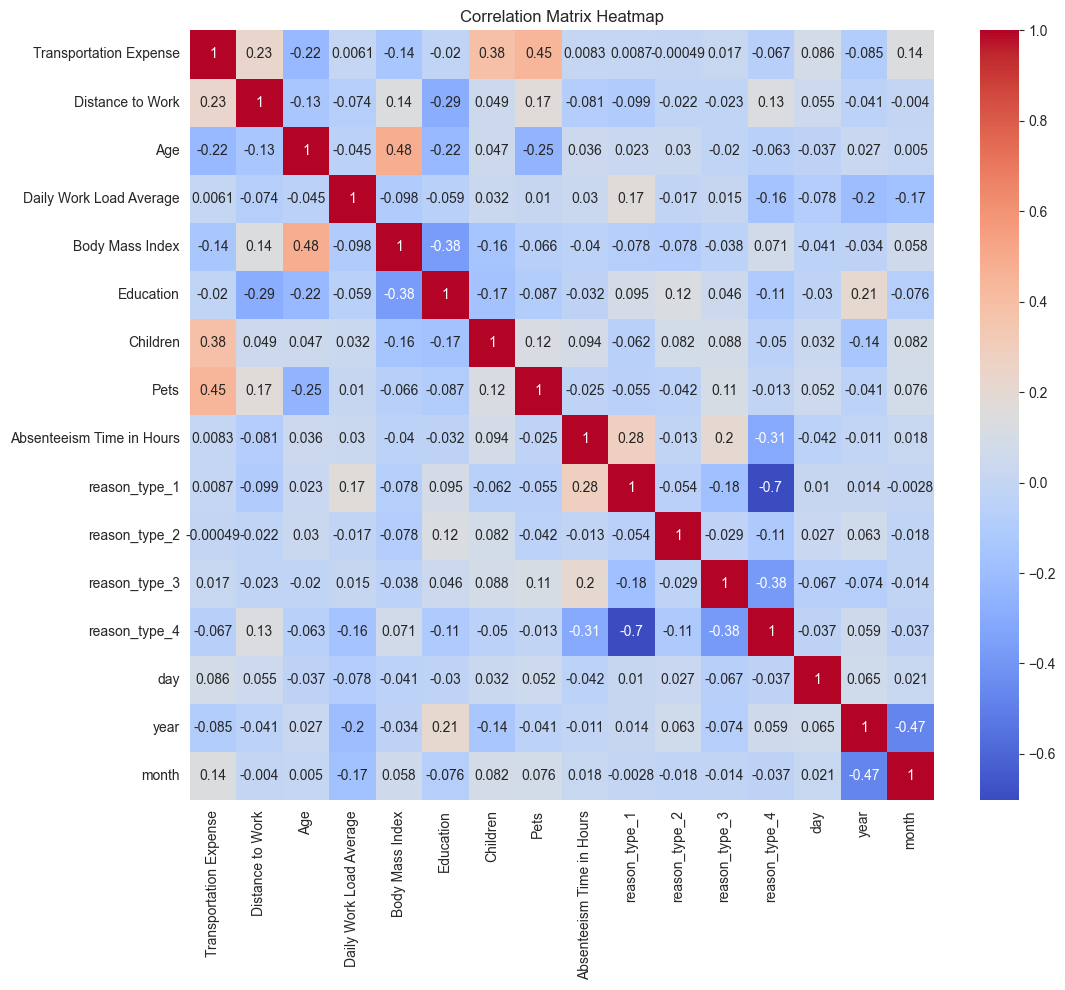

In [49]:
a = df_cleaned.drop(['month_name','day_name'],axis=1)
# corr = df_cleaned.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(a.corr(), annot=True, cmap='coolwarm') 
plt.title('Correlation Matrix Heatmap')
#plt.savefig('heatmap_correlation_matrix.png')
plt.show()


##### 5. Barplot of Transportation Expense by Education Level: #####

C:\Users\Netizens\AppData\Local\Temp\ipykernel_3932\418135962.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Education', y='Absenteeism Time in Hours',data=education_absenteeism, palette='viridis',legend=False)


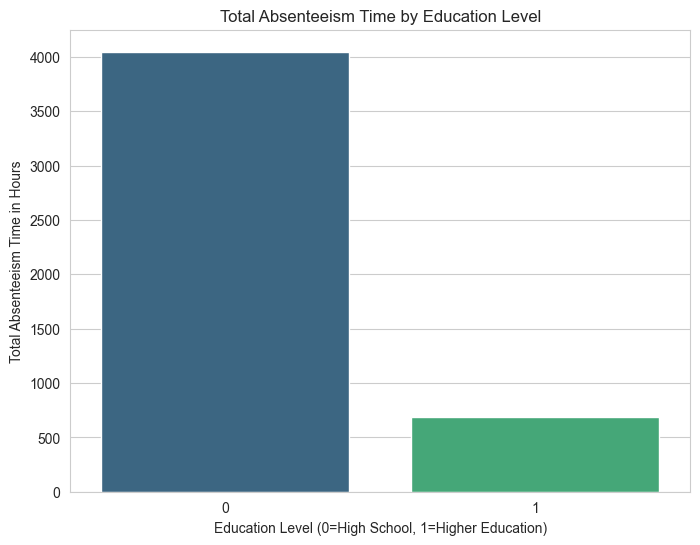

In [50]:
education_absenteeism = df_cleaned.groupby('Education')['Absenteeism Time in Hours'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Education', y='Absenteeism Time in Hours',data=education_absenteeism, palette='viridis',legend=False)
plt.title('Total Absenteeism Time by Education Level')
plt.xlabel('Education Level (0=High School, 1=Higher Education)')
plt.ylabel('Total Absenteeism Time in Hours')
# plt.savefig('barplot_education_absenteeism.png')
plt.show()


In [51]:
# plt.figure(figsize=(12, 8))
# sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
# plt.show()

In [59]:
a.isna().sum()

Transportation Expense       0
Distance to Work             0
Age                          0
Daily Work Load Average      0
Body Mass Index              0
Education                    0
Children                     0
Pets                         0
Absenteeism Time in Hours    0
reason_type_1                0
reason_type_2                0
reason_type_3                0
reason_type_4                0
day                          0
year                         0
month                        0
dtype: int64

In [53]:
df_cleaned['reason_type_4'] = df_cleaned['reason_type_4'].astype(bool)

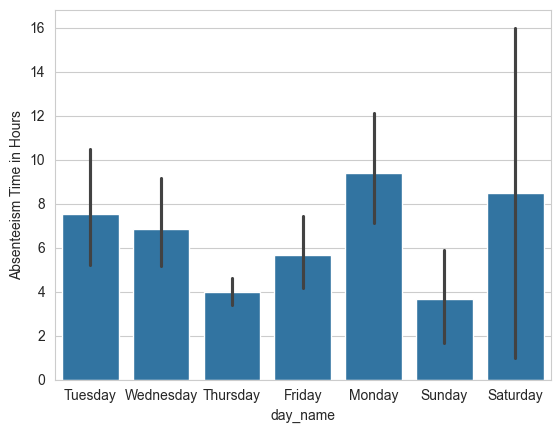

In [55]:
sns.barplot(x='day_name', y='Absenteeism Time in Hours', data=df_cleaned)
plt.show()

In [63]:
#sns.scatterplot(x='Age', y='Absenteeism Time in Hours', data=df_cleaned)

<Axes: xlabel='month_name', ylabel='Absenteeism Time in Hours'>

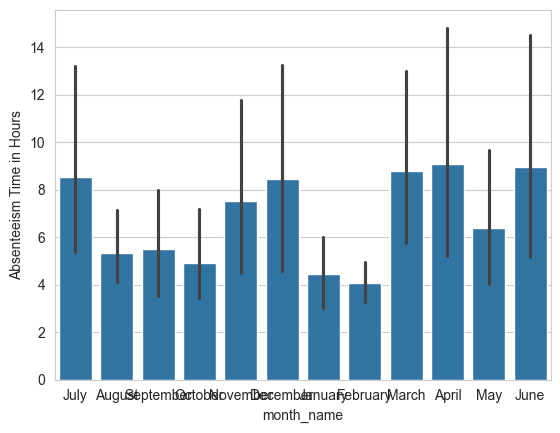

In [60]:
sns.barplot(x='month_name', y='Absenteeism Time in Hours', data=df_cleaned)

<Axes: xlabel='Education', ylabel='Absenteeism Time in Hours'>

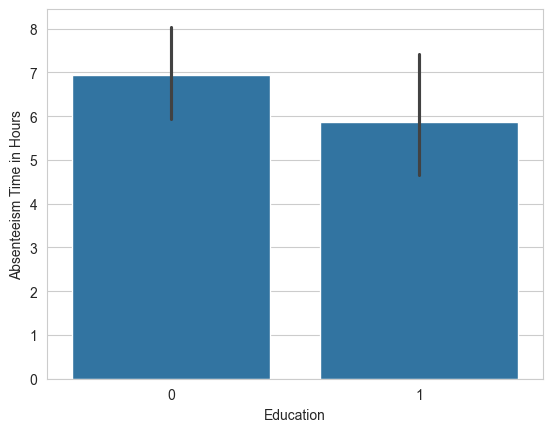

In [68]:
sns.barplot(x='Education', y='Absenteeism Time in Hours', data=df_cleaned)

<Axes: xlabel='Education', ylabel='Absenteeism Time in Hours'>

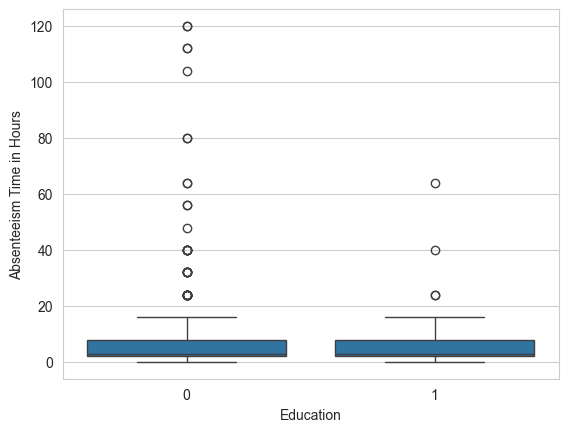

In [61]:
sns.boxplot(x='Education', y='Absenteeism Time in Hours', data=df_cleaned)

<Axes: xlabel='Age', ylabel='Absenteeism Time in Hours'>

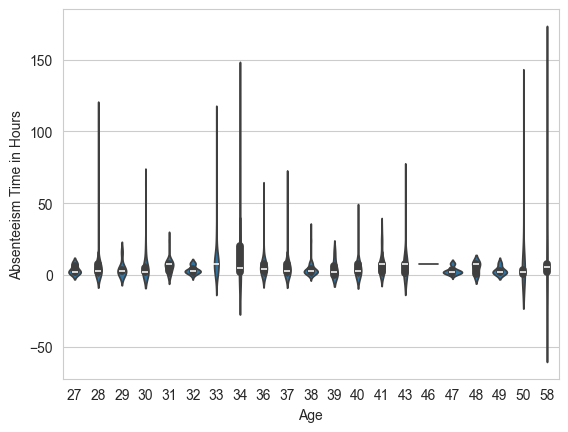

In [72]:
sns.violinplot(x='Age', y='Absenteeism Time in Hours', data=df_cleaned)

<Axes: xlabel='Age', ylabel='Absenteeism Time in Hours'>

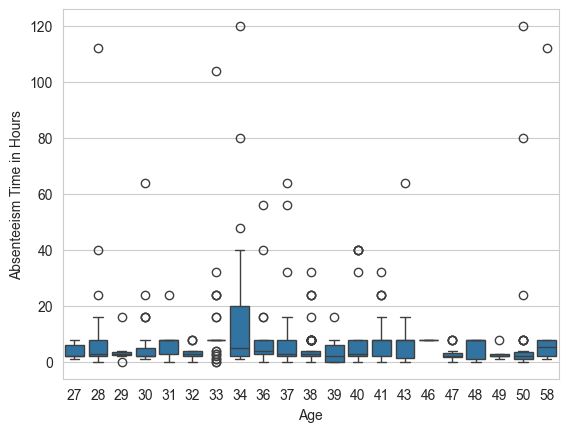

In [62]:
sns.boxplot(x='Age', y='Absenteeism Time in Hours', data=df_cleaned)

<Axes: xlabel='Age', ylabel='count'>

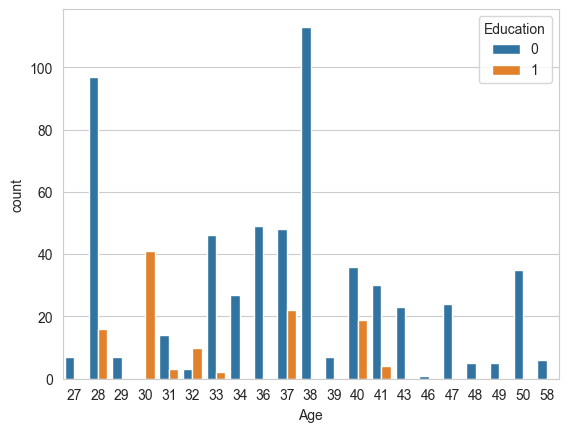

In [64]:
sns.countplot(x='Age', data=df_cleaned, hue='Education')

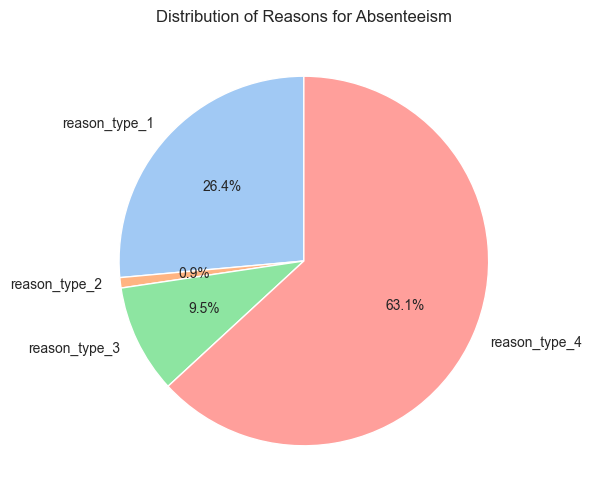

In [70]:
reason_counts = df_cleaned[['reason_type_1', 'reason_type_2', 'reason_type_3', 'reason_type_4']].sum()
labels = ['reason_type_1', 'reason_type_2', 'reason_type_3', 'reason_type_4']
plt.figure(figsize=(10, 6))
plt.pie(reason_counts, labels=labels, autopct='%1.1f%%', startangle=90,colors=sns.color_palette('pastel'))
plt.title('Distribution of Reasons for Absenteeism')
plt.show()

<Axes: xlabel='reason_type_1', ylabel='Absenteeism Time in Hours'>

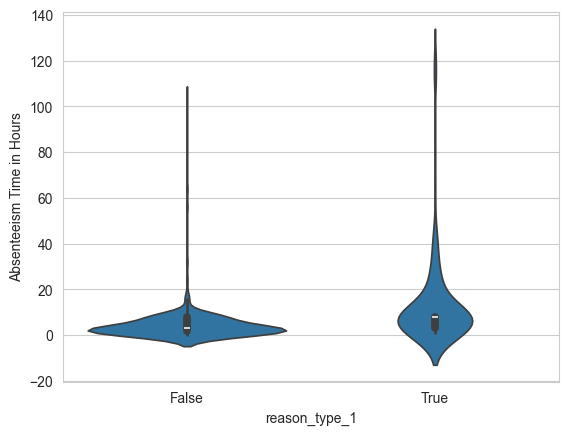

In [71]:
sns.violinplot(x='reason_type_1', y='Absenteeism Time in Hours', data=df_cleaned)

In [76]:
import emoji
print(emoji.emojize(":thumbs_up:")) 
print(emoji.emojize(":white_heart:"))

👍
🤍
